In [1]:
# Import pandas 
import pandas as pd
import numpy as np
  
# reading csv file
# r stands for raw string, helps with unicode error (slashes)
filepath = r"C:\Users\krawc\OneDrive\Documents\DB\datasets\eurovision-2018-votes.csv"
df1 = pd.read_csv(filepath, encoding = 'utf8')

In [2]:
df1.head()

,voting-country,voted-for,judge-a,judge-b,judge-c,judge-d,judge-e,jury-rank,jury-points,televoting-rank,televoting-points
0,Albania,Albania,-,-,-,-,-,-,-,-,-
1,Albania,Australia,14,23,19,22,25,-,-,-,-
2,Albania,Austria,15,15,11,17,12,-,-,9,2
3,Albania,Bulgaria,5,4,5,3,4,3,8,5,6
4,Albania,Cyprus,1,2,2,2,2,2,10,2,10


In [3]:
df2=df1.iloc[:,[0,1,-1]]
df2.columns=['ctr','song','pts']
df2.loc[:,'song']=df2.song.apply(lambda x: 'sn'+x)
df2.loc[:,'pts']=df2.pts.str.replace('-','0').astype('int')

In [4]:
df3=df2.pivot(index='ctr',columns='song',values='pts').fillna(0)

trainX=df3.values

target_names=df3.index.values
feature_names=df3.columns.values

In [5]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

#distance_matrix
# Calculate the linkage: mergings
mergings = linkage(trainX, method='complete')



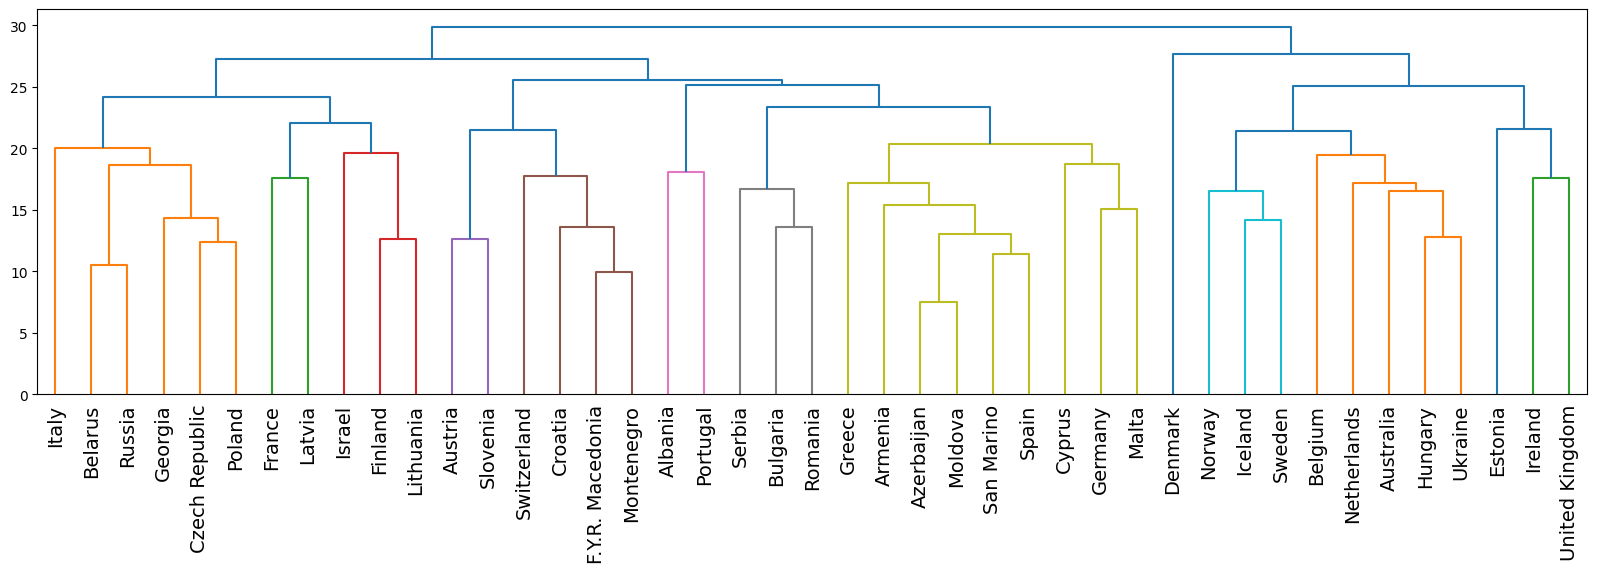

In [6]:
fig = plt.figure(figsize=(20,5))

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=target_names,
           leaf_rotation=90,
           leaf_font_size=14,
           
)


plt.show()

In [7]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings,21,criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'countries': target_names})

print(df.sort_values('labels'))

    labels         countries
31       1            Poland
16       1           Georgia
23       1             Italy
34       1            Russia
5        1           Belarus
10       1    Czech Republic
15       2            France
24       2            Latvia
22       3            Israel
25       3         Lithuania
14       3           Finland
3        4           Austria
37       4          Slovenia
8        5           Croatia
40       5       Switzerland
13       5  F.Y.R. Macedonia
28       5        Montenegro
0        6           Albania
32       6          Portugal
33       7           Romania
7        7          Bulgaria
36       7            Serbia
27       8           Moldova
35       8        San Marino
26       8             Malta
38       8             Spain
18       8            Greece
17       8           Germany
9        8            Cyprus
4        8        Azerbaijan
1        8           Armenia
20       9           Iceland
30       9            Norway
39       9    

c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\krawc\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\krawc\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executabl

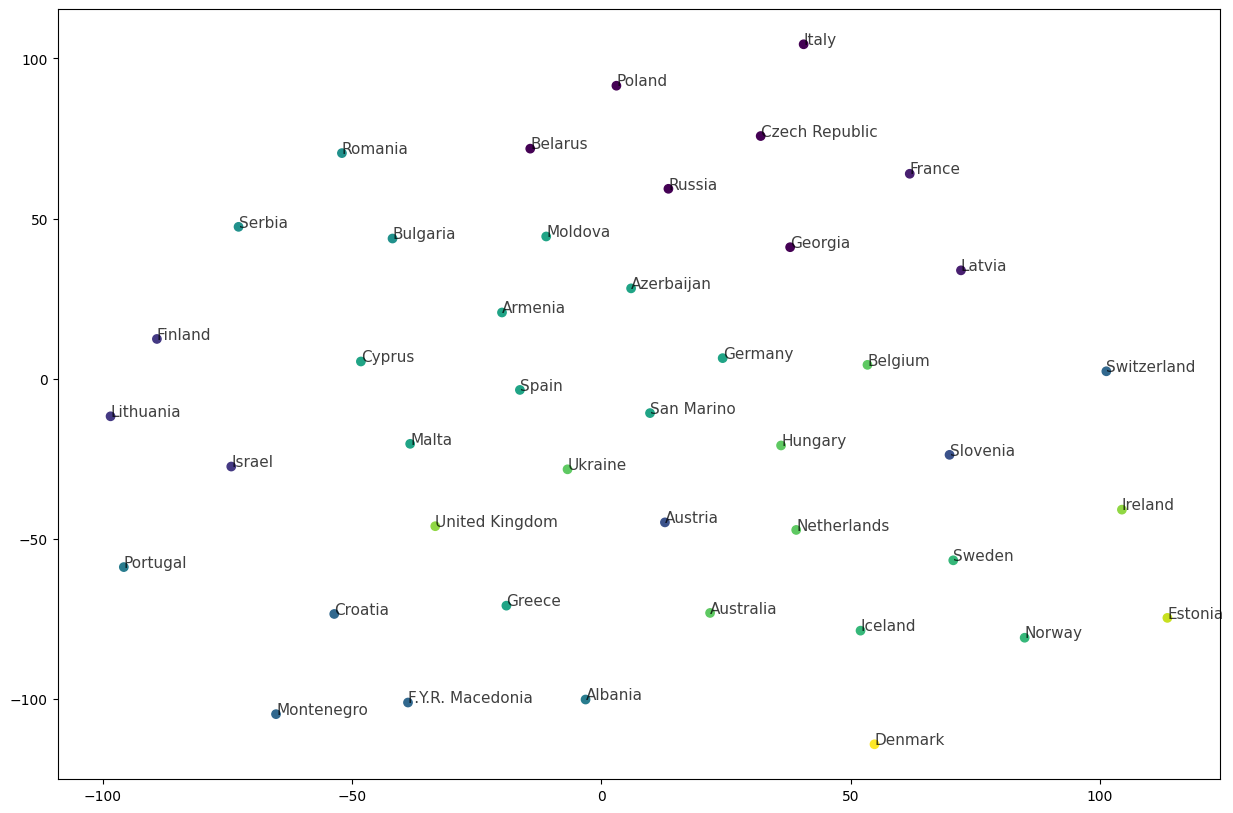

In [8]:
fig = plt.figure(figsize=(15,10))
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(trainX)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=labels)

# Annotate the points
for x, y, ctry in zip(xs, ys, target_names):
    plt.annotate(ctry, (x, y), fontsize=11, alpha=0.75)
plt.show()

In [ ]:
#PCA

In [9]:

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA(n_components=2)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(trainX)

# Transform the scaled samples: pca_features
pca_features = pipeline.transform(trainX)


In [10]:
#Kmeans just for colors
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=4)

# Fit model to points
model.fit(trainX)

# Determine the cluster labels of new_points: labels
Klabels = model.predict(trainX)

c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


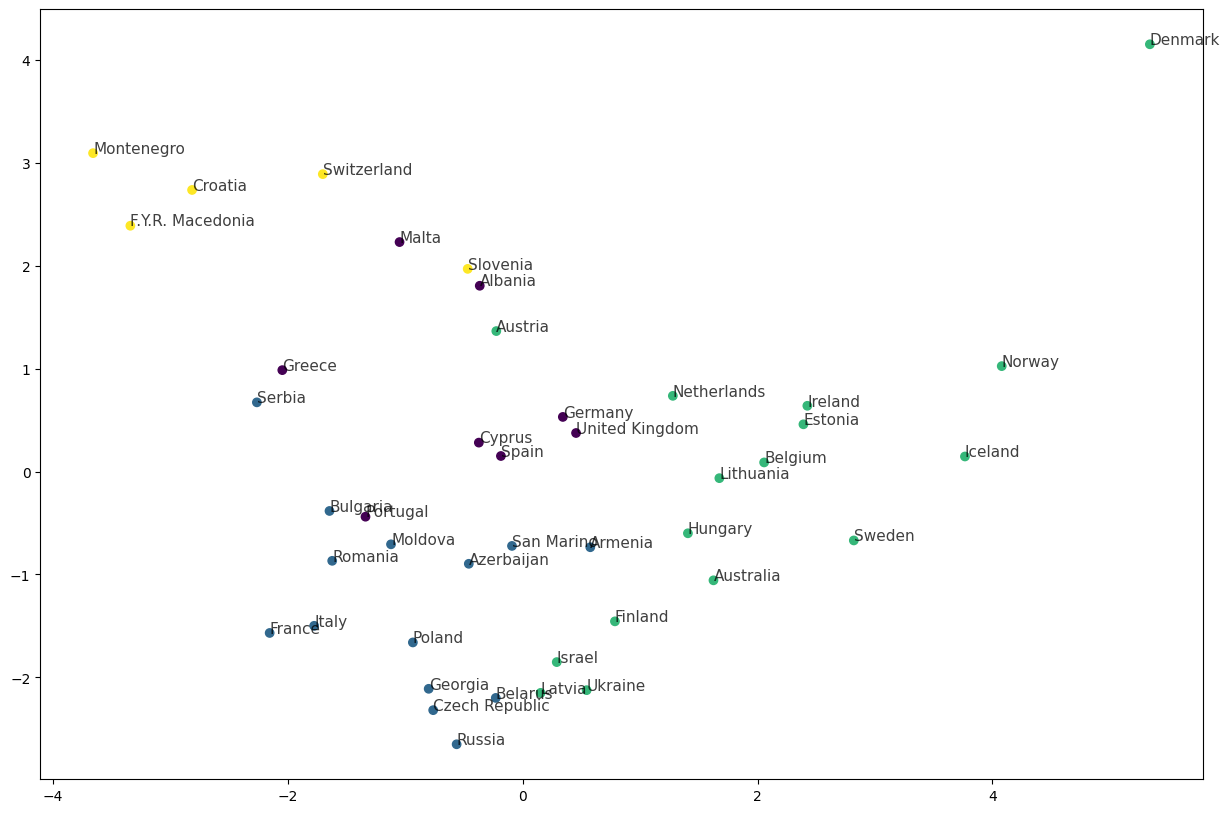

In [11]:
# Select the 0th feature: xs
xs = pca_features[:,0]

# Select the 1st feature: ys
ys = pca_features[:,1]

# Scatter plot, coloring by variety_numbers
fig = plt.figure(figsize=(15,10))

plt.scatter(xs,ys,c=Klabels)

# Annotate the points
for x, y, ctry in zip(xs, ys, target_names):
    plt.annotate(ctry, (x, y), fontsize=11, alpha=0.75)
plt.show()